In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw3.ipynb")

---

<h1><center>SDSE Homework 3 <br><br> Simple linear regression </center></h1>

---

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pickle

# 0. Load the data

In this homework we will implement simple linear regression and apply it to four different datasets. 

All of the formulas can be found in the lecture and reader. 

The four datasets are contained in `hw3data.pickle`. Each dataset is a tuple with entries `x` and `y`:  `DA = (x,y)`.

In [3]:
with open('hw3data.pickle','rb') as f:
    DA, DB, DC, DD = pickle.load(f)

# 1. Scatter plots

Display each of the four datasets using matplotlib [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) plots. Your plot should look similar to the one below, with two rows and two columns of plots.  

<img src="f1.png" />

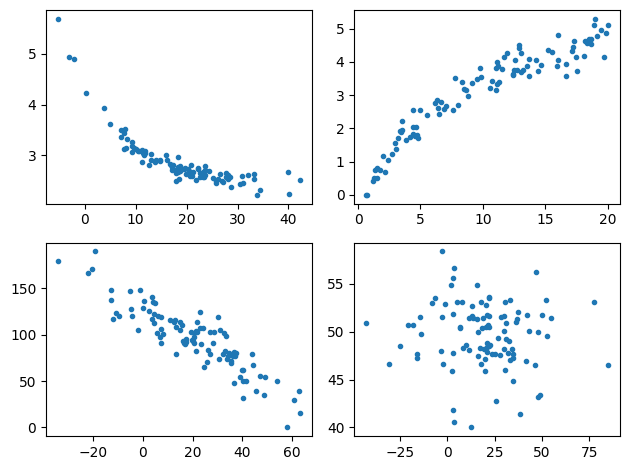

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2)

# Assuming each DA, DB, DC, DD is a tuple/list with two elements: x and y coordinates
ax[0, 0].scatter(DA[0], DA[1], marker='.')
ax[0, 1].scatter(DB[0], DB[1], marker='.')
ax[1, 0].scatter(DC[0], DC[1], marker='.')
ax[1, 1].scatter(DD[0], DD[1], marker='.')


plt.tight_layout()
plt.show()

# 2. Sample correlation coefficient

Implement the function `corr(D)` that takes a dataset tuple `D` and returns its sample correlation coefficient $r$. 

In [5]:
def estimate(x):
    return 1 / x.size * np.sum(x)

def variance(x):
    return estimate(x**2) - estimate(x)**2

def covariance(x,y):
    return estimate((x - estimate(x)) * (y - estimate(y)))

In [6]:
def corr(D):
    x, y = D
    return estimate((x - estimate(x)) * (y - estimate(y))) / np.sqrt(variance(x) * variance(y))     # TODO

In [7]:
rA = corr(DA)
rB = corr(DB)
rC = corr(DC)
rD = corr(DD)

print(f'rA={rA}')
print(f'rB={rB}')
print(f'rC={rC}')
print(f'rD={rD}')

rA=-0.8099147715792776
rB=0.9385834707944019
rC=-0.9010915016350497
rD=-0.08311748917950587


In [8]:
grader.check("q2")

q2 results: All test cases passed!

# 3. Compute linear regresssion coefficients

Implement the function `compute_linear_regression(D)` that takes a dataset tuple `D` and returns the coefficients of the linear regression $\theta_0$ and $\theta_1$. 

In [9]:
def compute_linear_regression(D):
    x, y = D                 # TODO
    theta1 = covariance(x,y)/variance(x)        # TODO
    theta0 = estimate(y) - theta1 * estimate(x)        # TODO
    return theta0, theta1

In [10]:
thetaA = compute_linear_regression(DA)
thetaB = compute_linear_regression(DB)
thetaC = compute_linear_regression(DC)
thetaD = compute_linear_regression(DD)

print(f'A: {thetaA}')
print(f'B: {thetaB}')
print(f'C: {thetaC}')
print(f'D: {thetaD}')

A: (3.749057503898908, -0.04621781614549091)
B: (0.9678247739262225, 0.2120596595638966)
C: (127.14629626815378, -1.5443047558209404)
D: (49.89831243488558, -0.013256989456468094)


In [11]:
grader.check("q3")

q3 results: All test cases passed!

# 4. Evaluate linear regresssion prediction

Implement the function `eval_linreg(theta,D)` that takes parameters $\theta=(\theta_0,\theta_1$ and the dataset `D=(x,y)` and returns the array of predictions $\hat{y}$ for the training data: 
$$\hat{y} = \theta_0 + x \theta_1$$

In [12]:
def eval_linreg(theta,D):
    x,y = D
    theta0, theta1 = theta
    yhat = theta0 + x * theta1
    return yhat

In [13]:
yhatA = eval_linreg(thetaA,DA)
yhatB = eval_linreg(thetaB,DB)
yhatC = eval_linreg(thetaC,DC)
yhatD = eval_linreg(thetaD,DD)

print(f'yhatA[:20:3]={yhatA[:20:3]}')
print(f'yhatB[:20:3]={yhatB[:20:3]}')
print(f'yhatC[:20:3]={yhatC[:20:3]}')
print(f'yhatD[:20:3]={yhatD[:20:3]}')

yhatA[:20:3]=[3.98923839 3.73908805 3.4193214  3.39071521 3.36528081 3.31764243
 3.26114505]
yhatB[:20:3]=[1.10744508 1.2380595  1.29750078 1.42506595 1.59110387 1.67990742
 1.71890906]
yhatC[:20:3]=[179.72584278 156.97516769 145.60977061 134.87236202 129.92229685
 126.71703594 121.67884977]
yhatD[:20:3]=[50.46531219 50.17274557 50.10828722 50.00413843 49.93722651 49.91523581
 49.86076567]


In [14]:
grader.check("q4")

q4 results: All test cases passed!

# 5. Plot linear regresssion prediction

Overlay the linear regression lines on each one of the scatter plots. Your plot should look like this:

<img src="f2.png" />

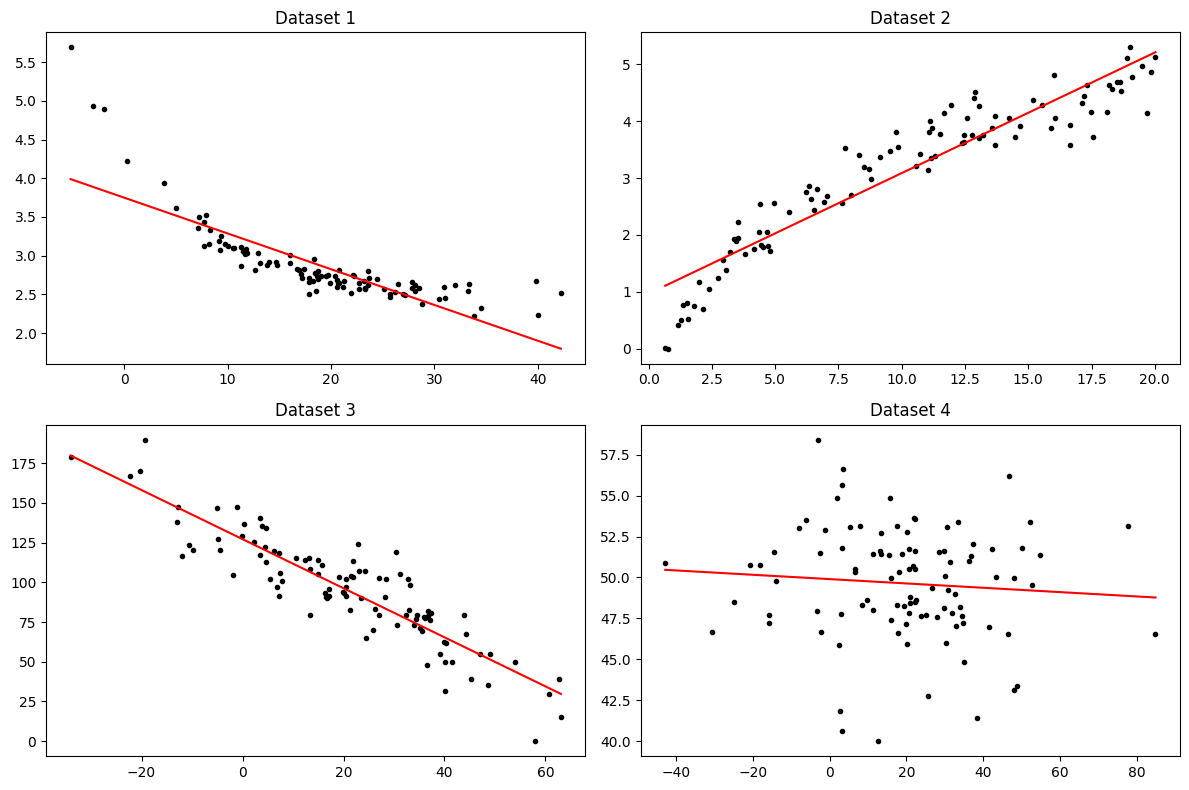

In [15]:
fig, ax = plt.subplots(figsize=(12,8), nrows=2, ncols=2)

datasets = [DA, DB, DC, DD]

for i, data in enumerate(datasets):
    x, y = data
    theta = compute_linear_regression(data)
    yhat = eval_linreg(theta, data)
    
    row, col = divmod(i, 2) 
    ax[row, col].scatter(x, y, color='k', marker='.')
    ax[row, col].plot(x, yhat, color='r')  
    ax[row, col].set_title(f"Dataset {i+1}")

plt.tight_layout()
plt.show()


# 6. Coefficient of determinination

Implement the function `eval_Rsquared(theta,D)` that takes parameters $\theta=(\theta_0,\theta_1)$ and the dataset `D` and returns the coefficient of determination $R^2$. Verify the identity $R^2=r^2$


In [65]:
def eval_Rsquared(theta,D):
    x,y = D
    theta0, theta1 = theta
    yhat = eval_linreg(theta,D)
    ybar = estimate(y)
    squaR = 1 - (np.sum((y - yhat)**2) / np.sum((y - ybar)**2))
    return squaR      # TODO

In [66]:
RsquaredA = eval_Rsquared(thetaA,DA)
RsquaredB = eval_Rsquared(thetaB,DB)
RsquaredC = eval_Rsquared(thetaC,DC)
RsquaredD = eval_Rsquared(thetaD,DD)

print(f'RsquaredA={RsquaredA}')
print(f'RsquaredB={RsquaredB}')
print(f'RsquaredC={RsquaredC}')
print(f'RsquaredD={RsquaredD}')

RsquaredA=0.6559619372223071
RsquaredB=0.8809389316484644
RsquaredC=0.8119658943189078
RsquaredD=0.006908517007505499


# 7. Estimate $\sigma^2$

Implement the function `estimate_sigma2(theta,D)` that takes parameters $\theta=(\theta_0,\theta_1)$ and the dataset `D` and returns an unbiased estimate of the variance $\sigma^2$ of the uncertainty values $\varepsilon_i$ in $y_i=\theta_0^* + x_i\theta_1^*  + \varepsilon_i$. 

$$\hat\sigma^2  = \frac{1}{N-2} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$


In [18]:
def estimate_sigma2(theta,D):
    x,y = D
    theta0, theta1 = theta
    yhat = eval_linreg(theta,D)
    vaR = 1 / (y.size - 2) * np.sum((y - yhat)**2)
    return vaR

In [19]:
sigma2A = estimate_sigma2(thetaA,DA)
sigma2B = estimate_sigma2(thetaB,DB)
sigma2C = estimate_sigma2(thetaC,DC)
sigma2D = estimate_sigma2(thetaD,DD)

print(f'sigma2A={sigma2A}')
print(f'sigma2B={sigma2B}')
print(f'sigma2C={sigma2C}')
print(f'sigma2D={sigma2D}')

sigma2A=0.09628829214622488
sigma2B=0.2082814866175884
sigma2C=218.8007261669828
sigma2D=11.604657865691143


In [20]:
grader.check("q7")

q7 results: All test cases passed!

# 8. Uncertainty in the linear regression coefficients

Implement the function `estimate_sigma2(theta,D)` that takes parameters $\theta=(\theta_0,\theta_1)$ and the dataset `D` and returns the variance associated with the linear regression parameter estimates $Var[\hat\Theta_0]$ and $Var[\hat\Theta_1]$.

In [21]:
def compute_var_param(theta, D):
    x, y = D
    theta0, theta1 = theta
    mux = estimate(x)
    n = len(x)

    sigmahatx = np.std(x, ddof=1)
    sigma2 = estimate_sigma2(theta, D)
    
    var0 = sigma2 /n + sigma2 * mux**2 / ((n - 1) * sigmahatx**2)
    var1 = sigma2 / ((n - 1) * sigmahatx**2)
    
    return var0, var1


In [22]:
DC

(array([-34.04739013, -22.22262485, -20.30337885, -19.31540475,
        -12.88868624, -12.85213609, -11.95584892, -10.67303218,
         -9.71908496,  -5.00294111,  -4.88546182,  -4.51821543,
         -1.79757303,  -1.01814831,  -0.10413845,   0.27796348,
          2.31562822,   3.46674573,   3.54039349,   3.8885319 ,
          4.36788167,   4.56578675,   4.73606256,   5.48901848,
          6.22149332,   6.87292341,   7.20423248,   7.25710048,
          7.45580997,   7.90834908,  10.68664334,  12.46883815,
         13.07965123,  13.27359013,  13.41438312,  14.89216672,
         14.97671705,  15.77437328,  16.24383019,  16.61792551,
         16.71621011,  17.17101233,  17.204953  ,  19.18601647,
         19.87838233,  20.19482656,  20.40057487,  20.42634986,
         20.51696954,  21.26641953,  21.43596536,  21.83594358,
         21.89177369,  22.91715108,  23.01920375,  23.39694387,
         24.26304287,  24.55460545,  25.75467363,  26.25716715,
         26.95568372,  26.98855678,  28.

In [23]:
varA = compute_var_param(thetaA,DA)
varB = compute_var_param(thetaB,DB)
varC = compute_var_param(thetaC,DC)
varD = compute_var_param(thetaD,DD)

print(f'A: {varA}')
print(f'B: {varB}')
print(f'C: {varC}')
print(f'D: {varD}')

A: (0.0049447069152034825, 1.1431957976526578e-05)
B: (0.00848039456463384, 6.201746581241883e-05)
C: (4.569117407139044, 0.005635582130422288)
D: (0.21272847310590537, 0.00025779124994615513)


In [24]:
grader.check("q8")

q8 results: All test cases passed!

# 9. Confidence intervals and hypothesis tests

Implement the function `compute_rho(theta,D,gamma)` that takes parameters $\theta=(\theta_0,\theta_1)$, the dataset `D`, and a confidence level $\gamma$, and returns the radiuses $\rho_0$ and $\rho_1$ of the $\gamma$-confidence intervals for $\theta^*_0$ and $\theta^*_1$ respectively. 

In [55]:
def compute_rho(theta, D, gamma):
    x, y = D
    n = len(x)

    t_value = stats.norm.ppf((1 + gamma) / 2)  # Using t-distribution
    var_theta0, var_theta1 = compute_var_param(theta, D)

    rho0 = t_value * (var_theta0 ** 0.5)
    rho1 = t_value * (var_theta1 ** 0.5)

    return rho0, rho1

In [56]:
gamma = 0.98
rhoA = compute_rho(thetaA,DA,gamma)
rhoB = compute_rho(thetaB,DB,gamma)
rhoC = compute_rho(thetaC,DC,gamma)
rhoD = compute_rho(thetaD,DD,gamma)

print(f'rhoA={rhoA}')
print(f'rhoB={rhoB}')
print(f'rhoC={rhoC}')
print(f'rhoD={rhoD}')

rhoA=(0.16358554892650393, 0.007865656343192947)
rhoB=(0.21423118381198702, 0.018320261402565534)
rhoC=(4.972683485858439, 0.17464013154879873)
rhoD=(1.0729697288034468, 0.03735155994008998)


In [57]:
grader.check("q9")

q9 results: All test cases passed!

# 10. Negligible parameters
For which of the slope parameters `thetaA[1]`, `thetaB[1]`, `thetaC[1]`, or `thetaD[1]` is the null hypothesis 
$$ H_0 : \theta^*_1=0$$
**not** rejected in favor of
$$ H_1 : \theta^*_1\neq0$$
with $\alpha=0.05$ significance level? 

Provide your answer as a string from `{'A','B','C','D'}`

In [58]:
answer = {'D'}

# 11. Nonlinear feature vector

The dataset `DA` looks like it could be modeled as an exponential decay. Let's use this insight to see whether we can improve the regression model for this dataset. Define a feture vector `phi` with
$$\phi(x) = e^{-\lambda x}$$
Using trial-and-error, find a value for $\lambda$ that achieves an $R^2$ of 0.9 or more. 

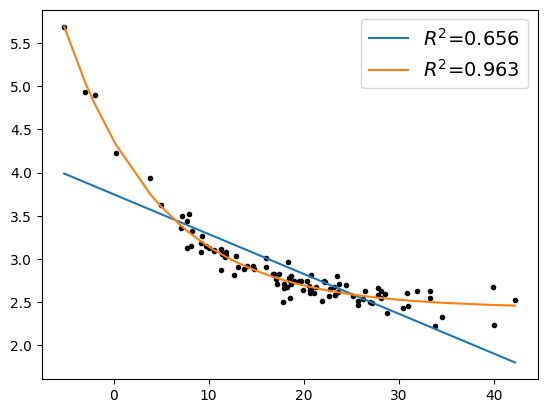

In [68]:
lbda = -1/10              # TODO
x, y = DA
phi = np.exp(lbda*x)
DA2 = (phi,y)
thetaA2 = compute_linear_regression(DA2)           # TODO
RsquaredA2 = eval_Rsquared(thetaA2, DA2)        # TODO

fig, ax = plt.subplots()
ax.scatter(DA[0],DA[1],color='k',marker='.')
ax.plot(DA[0],eval_linreg(thetaA,DA),label='$R^2$={:.3f}'.format(RsquaredA))
ax.plot(DA[0],eval_linreg(thetaA2,DA2),'-',label='$R^2$={:.3f}'.format(RsquaredA2))
ax.legend(fontsize=14)

In [ ]:
grader.check("q11")

# 12. Prediction uncertainty


Implement the function `compute_var_prediction(theta,D,gamma,xi)` that takes parameters $\theta$, the dataset `D`, and a data sample $x_i$, and returns the variance in the prediction $\hat{y}_i$ corresponding to $x_i$.

In [69]:
def compute_var_prediction(theta,D,xi):
    x, y = D
    N=len(x)
    xbar=np.mean(x)
    sigmahatx=np.std(x)
    sigma2 = estimate_sigma2(theta,D)
    var_yhat = ((sigma2) / N) + (((sigma2) * ((xi - xbar)**2) / (np.sum((x - np.mean(x))**2))))       # TODO
    return var_yhat      # TODO

In [70]:
varYA = compute_var_prediction(thetaA,DA,DA[0])
stddevYA = np.sqrt(varYA)

varYB = compute_var_prediction(thetaB,DB,DB[0])
stddevYB = np.sqrt(varYB)

varYC = compute_var_prediction(thetaC,DC,DC[0])
stddevYC = np.sqrt(varYC)

varYD = compute_var_prediction(thetaD,DD,DD[0])
stddevYD = np.sqrt(varYD)

print(f'stddevYA={stddevYA[:20:3]}')
print(f'stddevYB={stddevYB[:20:3]}')
print(f'stddevYC={stddevYC[:20:3]}')
print(f'stddevYD={stddevYD[:20:3]}')

stddevYA=[0.08643448 0.06966488 0.0498225  0.04820286 0.04679432 0.04424612
 0.0414014 ]
stddevYB=[0.08762327 0.08352081 0.08168098 0.07779715 0.07289334 0.07035215
 0.06925625]
stddevYC=[4.35776707 3.33866243 2.85387726 2.42265468 2.23691524 2.12253484
 1.95435833]
stddevYD=[1.05420215 0.72793851 0.65995923 0.55575209 0.49422517 0.47528383
 0.43187652]


In [71]:
grader.check("q12")

q12 results: All test cases passed!

# 13. Plot the prediction with uncertainty bounds

Repeat the scatter and prediction plot, but this time overlay an prediction uncertainty band of plus/minus two standard deviations. Your plot should look something like this:

<img src="f3.png" />


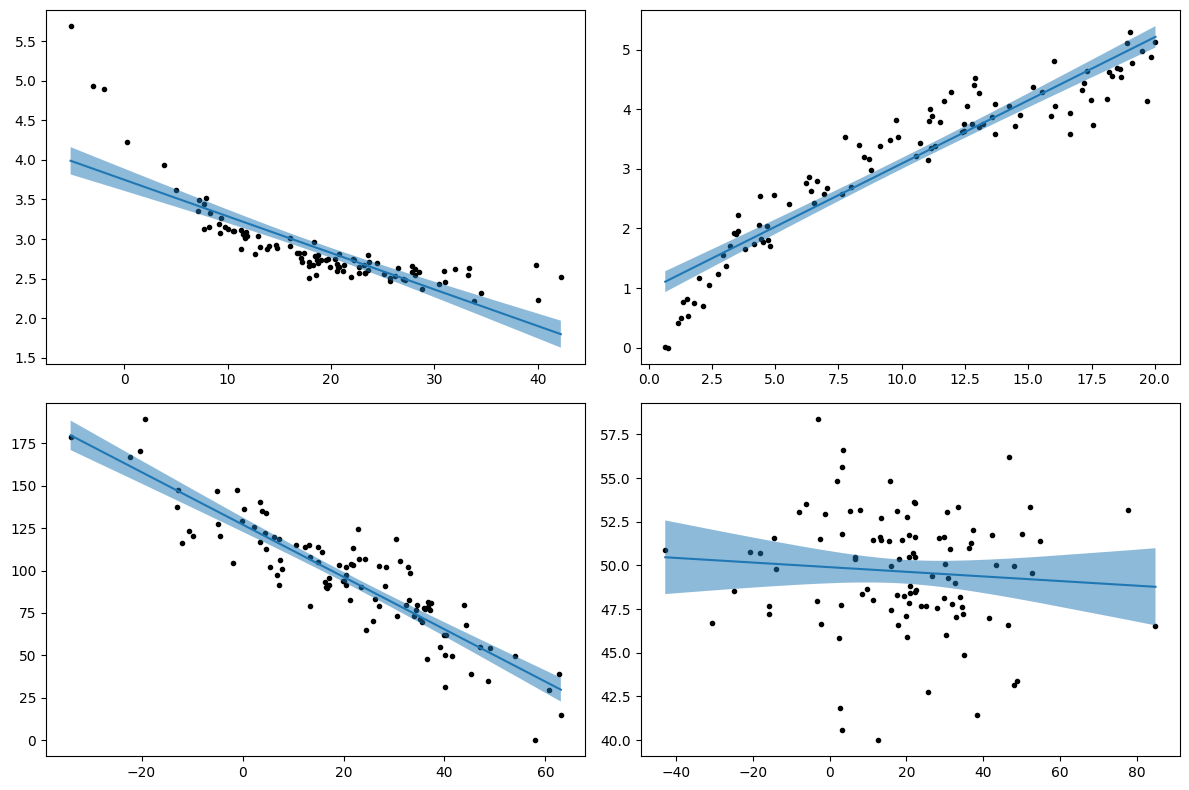

In [75]:
fig, ax = plt.subplots(figsize=(12,8), nrows=2, ncols=2)

# Dataset A
axA = ax[0,0]
yhatA = eval_linreg(thetaA, DA)
axA.scatter(DA[0], DA[1], color='k', marker='.')
axA.plot(DA[0], yhatA)
axA.fill_between(DA[0], yhatA-2*stddevYA, yhatA+2*stddevYA, alpha=0.5)

# Dataset B
axB = ax[0,1]
yhatB = eval_linreg(thetaB, DB)
axB.scatter(DB[0], DB[1], color='k', marker='.')
axB.plot(DB[0], yhatB)
axB.fill_between(DB[0], yhatB-2*stddevYB, yhatB+2*stddevYB, alpha=0.5)

# Dataset C
axC = ax[1,0]
yhatC = eval_linreg(thetaC, DC)
axC.scatter(DC[0], DC[1], color='k', marker='.')
axC.plot(DC[0], yhatC)
axC.fill_between(DC[0], yhatC-2*stddevYC, yhatC+2*stddevYC, alpha=0.5)

# Dataset D
axD = ax[1,1]
yhatD = eval_linreg(thetaD, DD)
axD.scatter(DD[0], DD[1], color='k', marker='.')
axD.plot(DD[0], yhatD)
axD.fill_between(DD[0], yhatD-2*stddevYD, yhatD+2*stddevYD, alpha=0.5)

plt.tight_layout()
plt.show()


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)